In [1]:
# to read old Matlab format
#from scipy.io import loadmat    
#feature_onse_3s = loadmat('data/feature_onset_3s.mat')

In [2]:
# v73 format is loaded by h5py
import h5py
import numpy as np

featureFilename = "data/feature_onset_3s.mat"
with h5py.File(featureFilename,'r') as hf:
    feature_cor = np.array(hf.get('WT_cor_onset_3s'))
    print('Shape of the array feature_cor = \n', feature_cor.shape)

    feature_incor = np.array(hf.get('WT_incor_onset_3s'))
    print('Shape of the array feature_incor = \n', feature_incor.shape)


Shape of the array feature_cor = 
 (36, 1596)
Shape of the array feature_incor = 
 (8, 1596)


Text(0,0.5,'count')

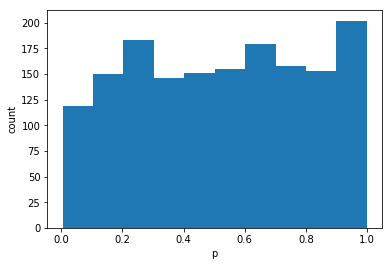

In [3]:
# Calculate the Wilcoxon rank sum test.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html

from scipy.stats import ranksums

numTrialCor, dimFeature = feature_cor.shape
numTrialIncor, dimFeature = feature_incor.shape

# for each channel*freq
pVal = list()
for i in range(dimFeature):
    T, p = ranksums(feature_cor[:,i], feature_incor[:,i])
    pVal.append(p)
    

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(pVal)
plt.xlabel('p')
plt.ylabel('count')

Text(0.5,0,'channel')

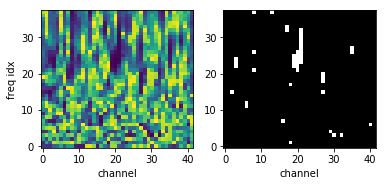

In [4]:
pVal2D = np.reshape(pVal, (38, 42))
idxSelectedFeature = pVal2D<0.05

plt.subplot(121)
plt.imshow(pVal2D)
plt.gca().invert_yaxis()
plt.xlabel('channel')
plt.ylabel('freq idx')
plt.subplot(122)
plt.imshow(idxSelectedFeature, cmap='gray')
plt.gca().invert_yaxis()
plt.xlabel('channel')

In [12]:
# print selected channels
Fs = [ 1,     2,     3,     4,     5,     6,     7,     8,     9,    10,    11,    12,    13,    15,
    17,    19,    21,    23,    25,    27,    29,    32,    36,    40,    44,    48,    52,    56,
    64,    68,    72,    76,    80,    84,    88,    92,    96,   100]

#pTh = 0.05
pTh = 0.1 # increase a bit 
#pTh = 0.15 # increase more

#plt.imshow(range(42),Fs, pVal2D)
listSelectedFeature = list()
for ch in range(42):
    for i in range(38):
        if pVal2D[i][ch] < pTh: #idxSelectedFeature[i,ch]:
            print("ch={}, freq={}".format(ch+1,Fs[i]))
            listSelectedFeature.append((ch+1,i))
np.savetxt("listSelectedFeature_p{}.txt".format(pTh), listSelectedFeature)
print(listSelectedFeature)
print(len(listSelectedFeature))

ch=1, freq=19
ch=2, freq=19
ch=3, freq=8
ch=3, freq=17
ch=3, freq=19
ch=3, freq=40
ch=3, freq=44
ch=3, freq=48
ch=4, freq=8
ch=4, freq=21
ch=4, freq=36
ch=4, freq=40
ch=4, freq=44
ch=4, freq=48
ch=5, freq=56
ch=7, freq=12
ch=7, freq=13
ch=7, freq=64
ch=8, freq=5
ch=8, freq=27
ch=8, freq=29
ch=8, freq=32
ch=9, freq=29
ch=9, freq=32
ch=9, freq=36
ch=9, freq=44
ch=9, freq=48
ch=9, freq=52
ch=9, freq=56
ch=9, freq=72
ch=9, freq=76
ch=9, freq=80
ch=9, freq=84
ch=9, freq=88
ch=9, freq=92
ch=9, freq=96
ch=9, freq=100
ch=10, freq=1
ch=10, freq=96
ch=11, freq=1
ch=11, freq=44
ch=11, freq=48
ch=12, freq=1
ch=14, freq=7
ch=14, freq=13
ch=14, freq=96
ch=14, freq=100
ch=16, freq=1
ch=17, freq=7
ch=17, freq=8
ch=17, freq=9
ch=18, freq=76
ch=18, freq=80
ch=18, freq=84
ch=18, freq=88
ch=19, freq=2
ch=19, freq=23
ch=19, freq=25
ch=20, freq=32
ch=20, freq=36
ch=20, freq=40
ch=20, freq=44
ch=20, freq=48
ch=21, freq=32
ch=21, freq=36
ch=21, freq=40
ch=21, freq=44
ch=21, freq=48
ch=21, freq=52
ch=22, freq=

In [6]:
# Now, select features 
idx=np.array(pVal)<pTh
selected_feature_cor = feature_cor[:,idx]
selected_feature_incor = feature_incor[:,idx]

In [7]:
print(selected_feature_cor.shape)
print(selected_feature_incor.shape)

(36, 112)
(8, 112)


In [8]:
# let's standardize data
X = np.concatenate((selected_feature_cor, selected_feature_incor),axis=0)
Y = np.append(np.ones(numTrialCor),-np.ones(numTrialIncor))

from sklearn import preprocessing
# http://scikit-learn.org/stable/modules/preprocessing.html
X_scaled = preprocessing.scale(X)

print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[ 7.54447010e-16  5.17263000e-16  2.24820162e-15  7.11552029e-16
 -2.56612913e-15 -1.66028807e-15 -2.62416351e-16 -3.67382892e-15
 -1.39408687e-15 -3.98298917e-16 -1.56046262e-16 -1.95550646e-16
  1.94289029e-15  3.06825272e-15 -3.22973971e-16  1.54674253e-15
  4.94553893e-16 -2.94272182e-15 -1.75869420e-15 -3.43759112e-15
  6.18192366e-16  2.78186565e-16  7.91033905e-16 -7.46877307e-16
  1.54926577e-15  1.74355480e-15 -8.70515781e-17 -2.37940980e-15
 -9.75229998e-16 -2.24504758e-15  2.29614307e-15 -5.09693298e-16
 -5.77820620e-16  6.09613370e-15 -3.22217001e-15  3.95643114e-15
  1.28180295e-15  1.43256619e-15 -7.21644966e-16  8.60422844e-16
  1.75995582e-15  7.56970244e-15 -2.64182615e-15 -1.97316910e-15
  1.66533454e-15 -1.91765795e-16 -9.61352210e-16 -6.67395432e-16
  4.78657518e-15 -2.67462820e-16 -2.19269047e-15 -1.44581317e-15
  3.97409378e-16  1.61581607e-15  1.58963751e-15  8.45283439e-16
 -1.05092702e-15 -2.56108266e-16  9.03317825e-16  3.16823588e-16
  8.90701654e-16  1.51646

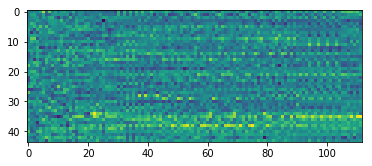

In [9]:
plt.imshow(X_scaled)

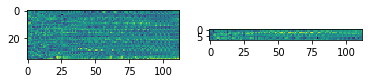

In [10]:
# compare mean
plt.subplot(121)
plt.imshow(X_scaled[Y>0,:])
plt.subplot(122)
plt.imshow(X_scaled[Y<0,:])

In [11]:
# save to a file
np.savetxt("WT_3s_X_p{}.txt".format(pTh),X)   # 44x45
np.savetxt("WT_3s_X_scaled_p{}.txt".format(pTh),X_scaled)   # 44x45
np.savetxt("WT_3s_Y_p{}.txt".format(pTh), Y)         # 44x1

# copy these files to data/